# Worksheet 3


This worksheet is a continuation of worksheet 2. Our goal of worksheet 2 is to write a function to do data manipulation. The desired output looks like 

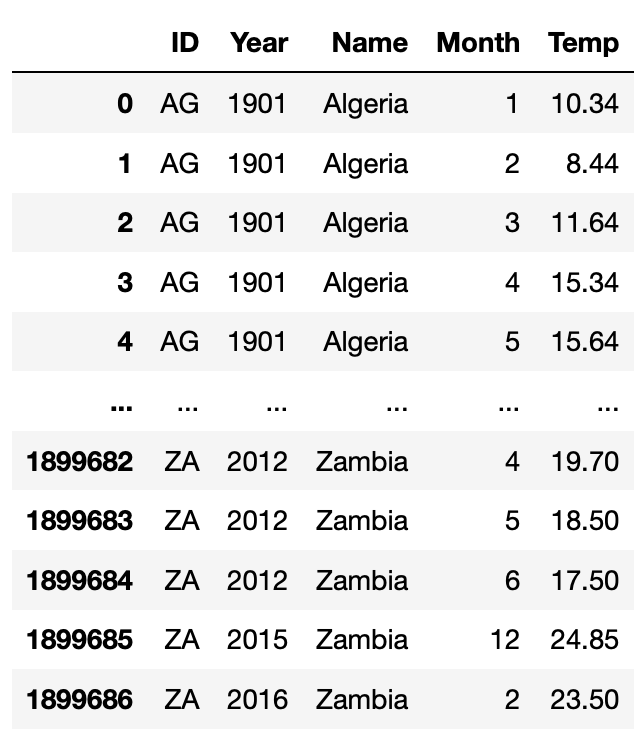

#### Submission:

Please **restart the kernel and run all**, then submit your worksheet (pdf version) to Gradescope. To download a pdf file, go to "File" in the menu bar, then find "print preview", and save as a pdf.

## Instructions of worksheet 2

The instructions of worksheet 2 are given below. You do not need to repeat worksheet 2. In other words, you can use any codes and functions in the worksheet 2.

#### Part 1: Concatenate vs merge

Read documentations [pandas.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) and [pandas.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html), then use your own words (one or two lines) to state the differences. 

#### Part 2: Combine two dataframes to one

Given the following temperature datasets, merge them to a large dataframe

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

#### Part 3

Write a function, which takes two dataframes as inputs and returns a new dataframe, to do data manipulation.

Inputs:

- `df1: temperature data.`
- `df2: country-code data.` This is the same dataframe I use during the lecture, which can be found here: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

Outputs:
- `df3: a new dataframe including several columns (see example below)`

## Instructions of worksheet 3:

Follow the instructions to finish this worksheet.

#### Part 1: Average temperature

Given a country name and a certain month, you should write a function to compute the average temperature. The output of this function be a sentence (you may use `print` inside your function, see example below). Docstrings and inline comments are required to explain your function and codes. The solution is not unique, you can use any commands.

This page is helpful if you want to convert a number to month name: https://stackoverflow.com/questions/6557553/get-month-name-from-number

**Desired ouptput:** After calling the function (`average` is my function name ), the desired output looks like
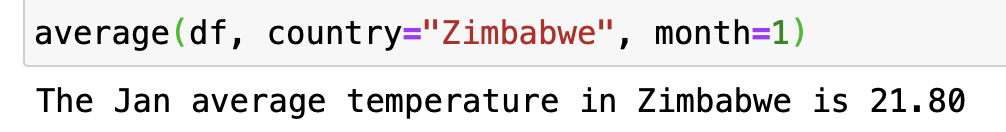


#### Part 2: Data visualization

Given a country name, we want to visualize the year average temperature. Notice that two temperature datasets are given, one is from 1901 to 1910 and the other is from 2011 to 2020.

You should write a function to do this and the output of your function is a plot with two lines (one is for 1901-1910 and the other is for 2011-2020), see example below. 

The average temperature change plot for Zimbabwe is shown as
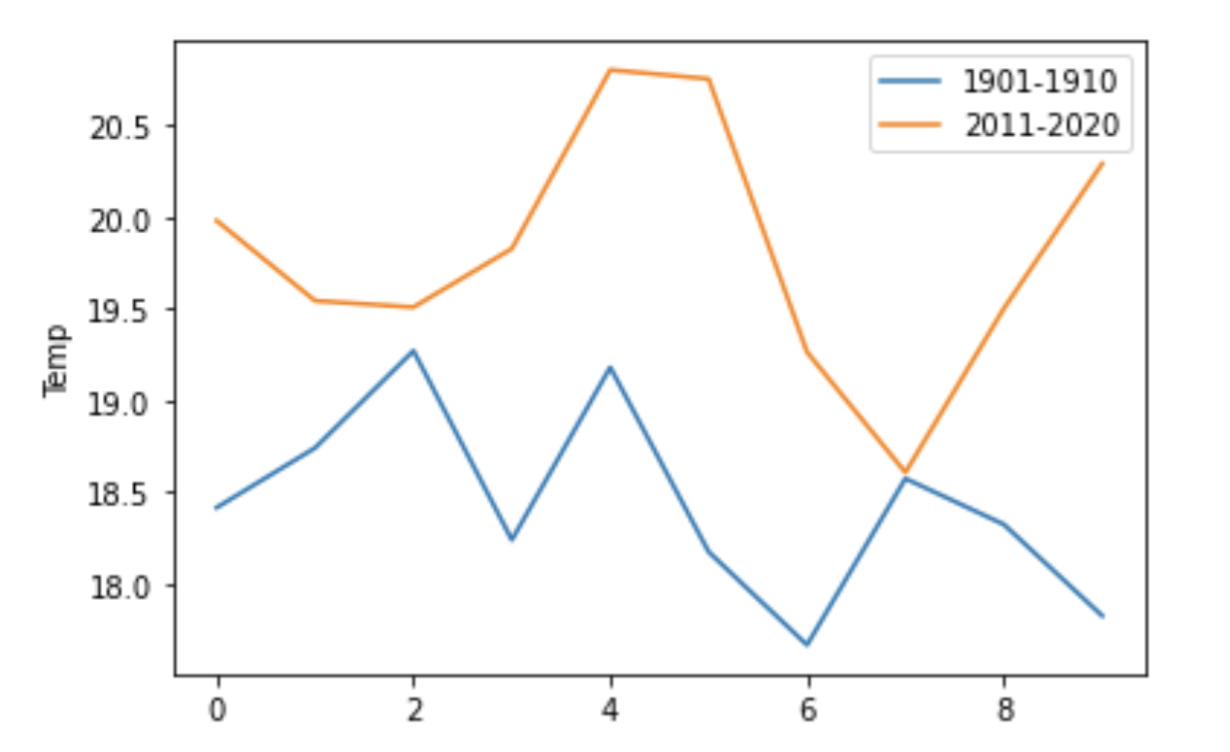

You are expect to create a similar plot for any country, which means country name should be one of the function inputs. However, x-labels, y-labels, plot title and etc are missing in my plot, you should also add meaningful labels and legends for your plot.

In [1]:
#from worksheet 2
import pandas as pd
import seaborn as sns 

from matplotlib import pyplot as plt
import numpy as np

df_1900 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv')
df_2000 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv')

df1 = pd.concat([df_1900, df_2000], axis = 0, ignore_index = True)

df_1900 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv')
df_2000 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv')

df1 = pd.concat([df_1900, df_2000], axis = 0, ignore_index = True)

df2 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv')

def merge(df1,df2):
    df1["FIPS 10-4"] = df1["ID"].str[0:2]

    df3 = pd.merge(df1, df2, on = ["FIPS 10-4"])

    columns_to_divide = ['VALUE1', 'VALUE2', 'VALUE3', 'VALUE4', 'VALUE5', 
                     'VALUE6', 'VALUE7', 'VALUE8', 'VALUE9', 'VALUE10', 
                     'VALUE11', 'VALUE12']
    df3[columns_to_divide] = df3[columns_to_divide] / 100
    df3 = df3.drop(["FIPS 10-4", "ISO 3166"], axis = 1)
    df3 = df3.set_index(keys=["ID", "Year", "Name"])
    df3 = df3.stack()
    df3 = df3.reset_index()
    df3 = df3.rename(columns = {"level_3"  : "Month" , 0 : "Temp"})
    df3["Month"] = df3["Month"].str[5:].astype(int)
    return df3

df_merged = merge(df1,df2)
df_merged


#Part 1
import calendar

def average_temp(df, country_name, month_num):
    # Filter dataframe by country and month
    filtered_df = df[(df['Name'] == country_name) & (df['Month'] == month_num)]
    
    # Calculate the average temperature
    avg_temp = filtered_df['Temp'].mean()
    
    # Get month name
    month_name = calendar.month_name[month_num]
    
    # Print the result
    print(f"The average temperature in {country_name} during {month_name} is {avg_temp:.2f}°C")

# Example usage
average_temp(df_merged,'Algeria', 7) 

The average temperature in Algeria during July is 29.20°C


C:\Users\Luca\AppData\Local\Temp\ipykernel_12992\1544449227.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['Period'] = df_country['Year'].apply(lambda x: '1901-1910' if 1901 <= x <= 1910 else '2011-2020')


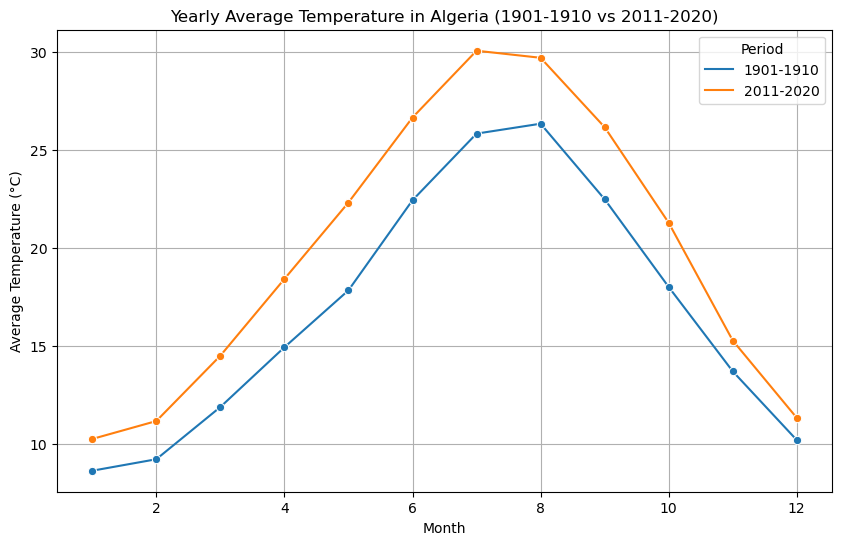

In [2]:
#Part 2
def plot_yearly_average_temp(df, country_name):

    # Filter data for the given country
    df_country = df[df['Name'] == country_name]
    
    # Create a column for time period classification
    df_country['Period'] = df_country['Year'].apply(lambda x: '1901-1910' if 1901 <= x <= 1910 else '2011-2020')
    
    # Group by year and period, then calculate the average temperature
    df_avg = df_country.groupby(['Month', 'Period'])['Temp'].mean().reset_index()
    
    # Plot the data using seaborn
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Month', y='Temp', hue='Period', data=df_avg, marker='o')

    # Add labels, title, and legend
    plt.xlabel('Month')
    plt.ylabel('Average Temperature (°C)')
    plt.title(f'Yearly Average Temperature in {country_name} (1901-1910 vs 2011-2020)')
    plt.legend(title='Period')
    
    # Show the plot
    plt.grid(True)
    plt.show()

plot_yearly_average_temp(df_merged, 'Algeria')